In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import os
%matplotlib inline

In [2]:
def get_sdf_paths(folder):
    return (os.path.join(folder, f) 
            for f in os.listdir(folder) 
            if 'sdf' in f)

In [5]:
folder = 'D:\\Alchemy\\dev\\atom_11'

In [6]:
sdfs = get_sdf_paths(folder)

In [14]:
data = pd.read_csv(r'e.txt')
data.head()

,fname,smiles,formula,C,H,O,N,F,S,Cl


In [16]:
fn = pd.concat([pd.DataFrame([filename], columns=['fname'])
             for filename in sdfs],ignore_index=True)

In [23]:
data['fname']=fn['fname']
for i,sdf_file in enumerate(data['fname']):
    with open(sdf_file, 'r') as f:
        sdf_string = f.read()
        mol = Chem.MolFromMolBlock(sdf_string, removeHs=False)
        if mol is None:
            print("rdkit can not parsing", sdf_file)
    data.loc[i,'smiles'] =Chem.MolToSmiles(mol)
    data.loc[i,'formula'] = Chem.rdMolDescriptors.CalcMolFormula(mol)
data.head()

,fname,smiles,formula,C,H,O,N,F,S,Cl
0,D:\Alchemy\dev\atom_11\1000036.sdf,[H]OC([H])(C([H])([H])[H])C([H])([H])C([H])([H...,C8H13NOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D:\Alchemy\dev\atom_11\1000881.sdf,[H]C1=C(C([H])([H])C2(C([H])([H])[H])C([H])([H...,C11H16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D:\Alchemy\dev\atom_11\100227.sdf,[H]c1sc(C([H])([H])[H])c(C2([H])C(=O)C([H])([H...,C9H10OS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D:\Alchemy\dev\atom_11\1002965.sdf,[H]C#Cc1sc([H])c(O[H])/c(=N/[H])c1C([H])([H])[H],C8H7NOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D:\Alchemy\dev\atom_11\1010264.sdf,[H]C1=C([H])C([H])([H])C([H])(c2sc([H])nc2C([H...,C9H11NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
import re
elements = ['C', 'O', 'N', 'Cl',  'F', 'S', 'H']
for e in elements:
    data[e] = 0
    for i,s in enumerate(data['formula']):
        p1 = s.find(e)
        if p1 != -1:
            data.loc[i,e] = 1
            p = p1 + len(e)
            n = re.search(r'\d*',s[p:p+2]).group()
            if n !=  '': 
                n = int(''.join(n))
                data.loc[i,e] = n
        else:
            data.loc[i,e] = 0
data.head()

,fname,smiles,formula,C,H,O,N,F,S,Cl
0,D:\Alchemy\dev\atom_11\1000036.sdf,[H]OC([H])(C([H])([H])[H])C([H])([H])C([H])([H...,C8H13NOS,8,13,1,1,0,1,0
1,D:\Alchemy\dev\atom_11\1000881.sdf,[H]C1=C(C([H])([H])C2(C([H])([H])[H])C([H])([H...,C11H16,11,16,0,0,0,0,0
2,D:\Alchemy\dev\atom_11\100227.sdf,[H]c1sc(C([H])([H])[H])c(C2([H])C(=O)C([H])([H...,C9H10OS,9,10,1,0,0,1,0
3,D:\Alchemy\dev\atom_11\1002965.sdf,[H]C#Cc1sc([H])c(O[H])/c(=N/[H])c1C([H])([H])[H],C8H7NOS,8,7,1,1,0,1,0
4,D:\Alchemy\dev\atom_11\1010264.sdf,[H]C1=C([H])C([H])([H])C([H])(c2sc([H])nc2C([H...,C9H11NS,9,11,0,1,0,1,0


In [25]:
data.to_csv('atom_11.csv')

In [26]:
ele_sum = []
ele_max = []
for e in elements:
    ele_sum.append(data[e].sum())
    ele_max.append(data[e].max())
ele_df = pd.DataFrame({'element':elements,'sum':ele_sum,'max':ele_max})
ele_df.sort_values('sum',ascending=False,inplace=True)
elements = list(ele_df['element'])
ele_df

,element,sum,max
6,H,48755,24
0,C,33052,11
1,O,4455,4
2,N,4063,4
5,S,1608,2
4,F,43,3
3,Cl,20,2


[H]N([H])C1=[N+]([H])C([H])([H])C(C([H])([H])[H])(C(C([H])([H])[H])(C([H])([H])[H])[N+]([H])([H])[H])N1[H]


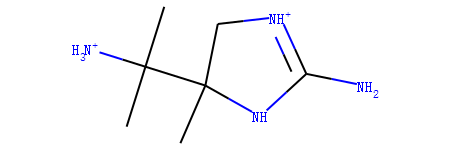

In [27]:
e = 'N'
n = 4
l = data.loc[data[e]==n,'smiles'].to_list()
m = Chem.MolFromSmiles(l[0])
print(l[0])
m